<a href="https://colab.research.google.com/github/LuisManuelCatzoliSoriano/EDP-I/blob/main/Clase5dic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [6]:
x, a, b = sp.symbols('x a b') # variable
u = sp.Function('u') # función

In [8]:
ode = u(x).diff(x,x) + u(x) + x
sp.dsolve(ode,u(x))

Eq(u(x), C1*sin(x) + C2*cos(x) - x)

In [9]:
sol = sp.dsolve(ode, ics={u(0):0,u(1):0}) # ics es un

In [10]:
sol

Eq(u(x), -x + sin(x)/sin(1))

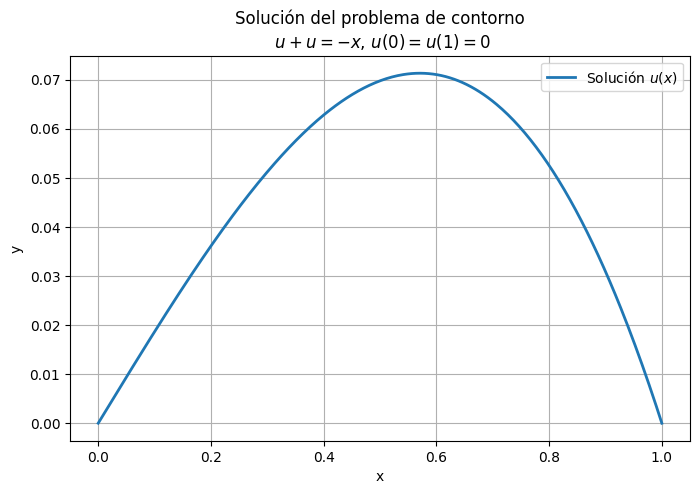

In [11]:
u_expr = sol.rhs

u_num = sp.lambdify(x,u_expr,"numpy")

xx = np.linspace(0,1,400)
yy = u_num(xx)

plt.figure(figsize=(8, 5))
plt.plot(xx, yy, label="Solución $u(x)$", linewidth=2)
plt.title('Solución del problema de contorno\n $u'' + u=-x$, $u(0)=u(1)=0$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

In [12]:
u_n= a*x*(1-x)+b*x**2*(1-x)

In [13]:
u_n

a*x*(1 - x) + b*x**2*(1 - x)

In [14]:
u_n_2=sp.diff(u_n,x,2)

E=u_n_2+u_n+ x

In [15]:
E

a*x*(1 - x) + b*x**2*(1 - x) + x - 2*(a + 2*b*x + b*(x - 1))

In [16]:
I= sp.integrate(E**2,(x,0,1))

In [17]:
I

101*a**2/30 + 101*a*b/30 - 11*a/6 + 131*b**2/35 - 19*b/10 + 1/3

In [18]:
dIa=sp.diff(I,a)
dIb=sp.diff(I,b)

In [19]:
print(dIa,"\n",dIb)

101*a/15 + 101*b/30 - 11/6 
 101*a/30 + 262*b/35 - 19/10


In [21]:
soleq=sp.solve([dIa,dIb], [a, b], simplify=True)
soleq

{a: 46161/246137, b: 413/2437}

In [23]:
u_approx=E.subs(soleq)

In [24]:
u_approx

413*x**2*(1 - x)/2437 + 46161*x*(1 - x)/246137 - 41*x/2437 - 8896/246137

In [25]:
u_approx_fn=sp.lambdify(x,u_approx, "numpy")

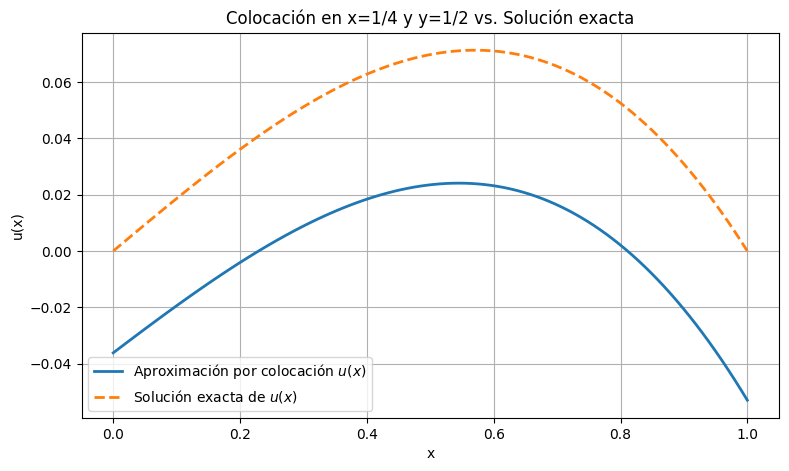

In [28]:
xx=np.linspace(0,1,100)
yy = u_num(xx)

plt.figure(figsize=(9, 5))
plt.plot(xx, u_approx_fn(xx), label="Aproximación por colocación $u(x)$", linewidth=2)
plt.plot(xx,yy, "--", label="Solución exacta de $u(x)$", linewidth=2)

# plt.scatter([0.25,0.5], u_approx_fn(np.array([0.25,0.5])),
           # color="red", s=70, label="Puntos de colocación")


plt.title('Colocación en x=1/4 y y=1/2 vs. Solución exacta')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.grid(True)
plt.legend()
plt.show()